# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [ ]:
!pip install pyforest

In [ ]:
import pyforest

In [ ]:
df = pd.read_csv('/content/cancer_classification.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#We don't have any missing values

In [ ]:
df.shape

(569, 31)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
#EDA

<IPython.core.display.Javascript object>

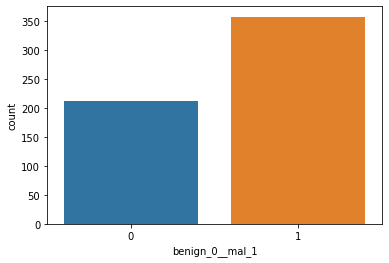

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

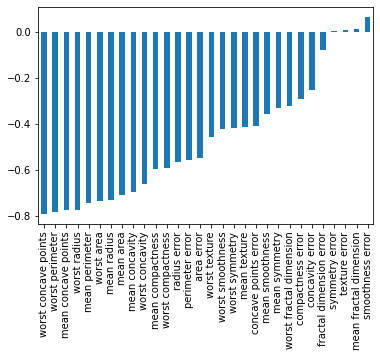

In [ ]:

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

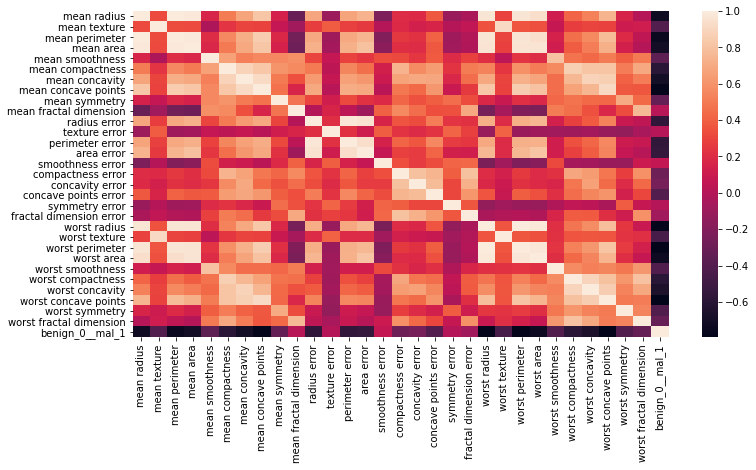

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [ ]:
X= df.drop('benign_0__mal_1',axis=1).values
y = df.benign_0__mal_1.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

### Dealing with overfitting and Evaluation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))


model.add(Dense(units=15,activation='relu'))


# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')





In [ ]:
model.fit(x = X_train , y = y_train, epochs = 600, validation_data=(X_test,y_test))


Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6825 - val_loss: 0.6688
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6627 - val_loss: 0.6482
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6441 - val_loss: 0.6218
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6175 - val_loss: 0.5929
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5915 - val_loss: 0.5638
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5574 - val_loss: 0.5308
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5312 - val_loss: 0.4982
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4944 - val_loss: 0.4585
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4537 - val_loss: 0.4136
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3973 - val_loss: 0.3718
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)

<IPython.core.display.Javascript object>

In [ ]:
losses.head()

,loss,val_loss
0,0.677854,0.668789
1,0.659677,0.648185
2,0.637502,0.621848
3,0.610771,0.592867
4,0.583497,0.563787


### Perfect example of overfitting

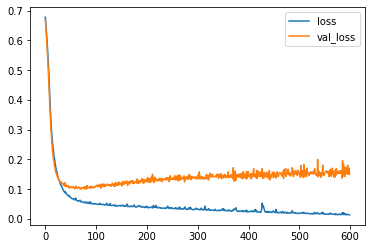

In [ ]:
losses.plot()

### Early Stopping

In [ ]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))


model.add(Dense(units=15,activation='relu'))


# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')





In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify as an improvement, i.e. an absolute
 |        change of less than min_delta, will count as no
 |        improvem

we have to keep in mind that 
- loss we want to use min for minimise 
- accuracy we want to use max for maximise

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)#patience means wait X number of epochs


In [ ]:
model.fit(x = X_train , y = y_train, epochs = 600, validation_data=(X_test,y_test),
          callbacks=[early_stop])


Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7039 - val_loss: 0.6695
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6572 - val_loss: 0.6283
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.5869
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5768 - val_loss: 0.5426
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5255 - val_loss: 0.4926
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4736 - val_loss: 0.4382
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4373 - val_loss: 0.3832
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3847 - val_loss: 0.3354
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3289 - val_loss: 0.2958
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2834 - val_loss: 0.2659
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

<IPython.core.display.Javascript object>

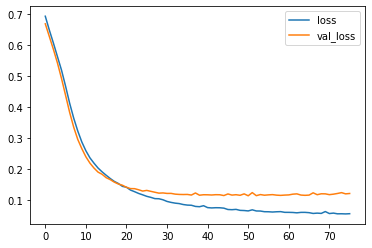

In [ ]:
model_loss.plot()

### Dropout layers 

Turn off percentage of neurons randomly

In [ ]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
#rate = percetange of randomly neurones to turn off

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))



# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam')





In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7358 - val_loss: 0.7096
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7102 - val_loss: 0.6946
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7001 - val_loss: 0.6848
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6813 - val_loss: 0.6780
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6831 - val_loss: 0.6697
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6790 - val_loss: 0.6607
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6568 - val_loss: 0.6492
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6559 - val_loss: 0.6348
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6320 - val_loss: 0.6186
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6370 - val_loss: 0.6016
Epoch 11

<IPython.core.display.Javascript object>

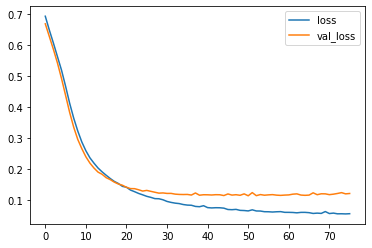

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]


We got fantastic result !